# **Churn Modelling**

In [2]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from scipy import stats
#train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,jaccard_score,log_loss
#modelos de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import shap

In [4]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Machine%20learning%20projects/Data/Churn_Modelling.csv'

## **Data Preprocesing**

In [5]:
df=pd.read_csv(url,sep=',')
df=pd.DataFrame(data=df)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2920,2921,15714658,Yates,696,France,Female,33,4,0.00,2,1,1,73371.65,0
2124,2125,15603851,Galkin,704,France,Male,32,7,127785.17,4,0,0,184464.70,1
9919,9920,15798084,Murray,688,France,Male,26,0,0.00,2,1,0,105784.85,0
3329,3330,15684925,Vicars,850,France,Female,43,3,0.00,2,0,0,2465.80,0
700,701,15803457,Hao,750,France,Female,32,5,0.00,2,1,0,95611.47,0
3811,3812,15589428,Tomlinson,756,France,Female,42,9,0.00,2,1,0,35673.42,0
9831,9832,15593283,Higgins,705,Germany,Female,48,1,156848.13,2,1,1,99475.95,1
876,877,15581229,Gregory,502,Germany,Female,32,1,173340.83,1,0,1,122763.95,0
3283,3284,15775335,Ellis,635,Germany,Female,48,4,81556.89,2,1,0,191914.37,0
711,712,15650288,Summers,634,Germany,Male,35,6,116269.01,1,1,0,129964.94,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.select_dtypes(include='object').nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [10]:
#Removed the surname column
df.drop(columns='Surname',inplace=True)
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.select_dtypes(include='number').nunique()

RowNumber          10000
CustomerId         10000
CreditScore          460
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
#Removed Rownumber
df.drop(columns='RowNumber',inplace=True)
df.drop(columns='CustomerId',inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

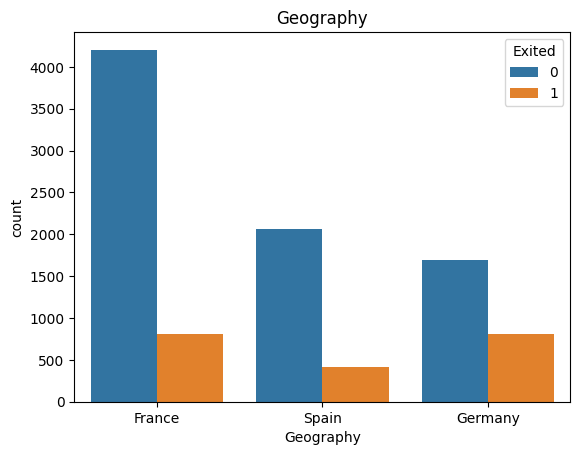

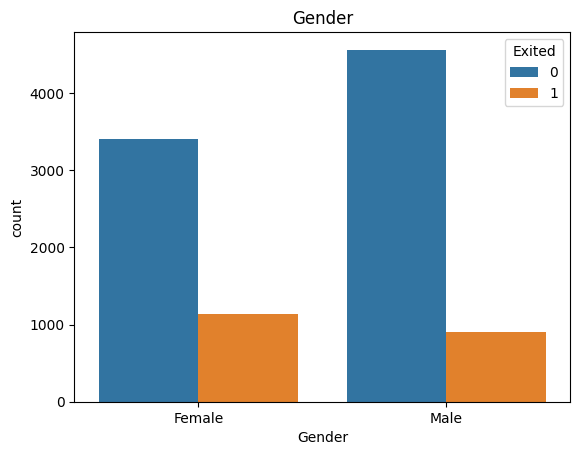

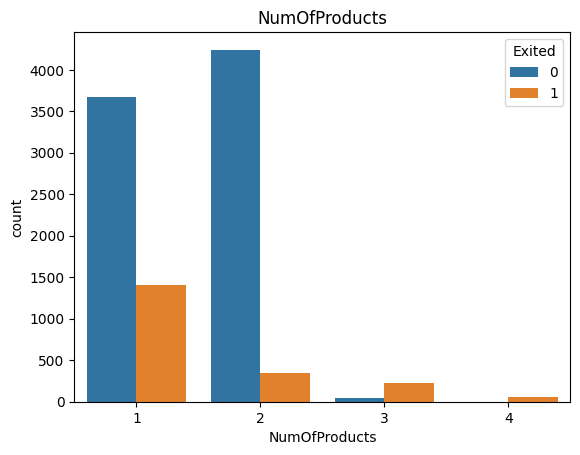

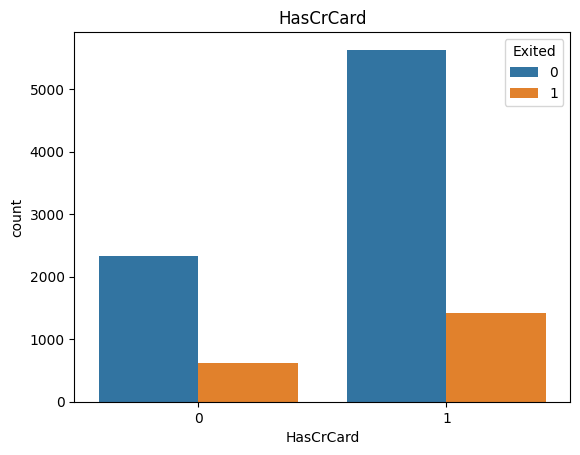

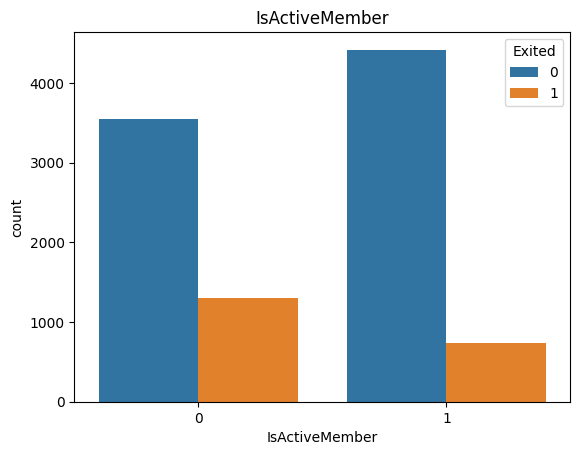

In [14]:
#variables categoricas
cat=['Geography', 'Gender','NumOfProducts','HasCrCard','IsActiveMember']
for i in cat:
  sns.countplot(x=i,hue='Exited',data=df)
  plt.title(i)
  plt.show()

In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

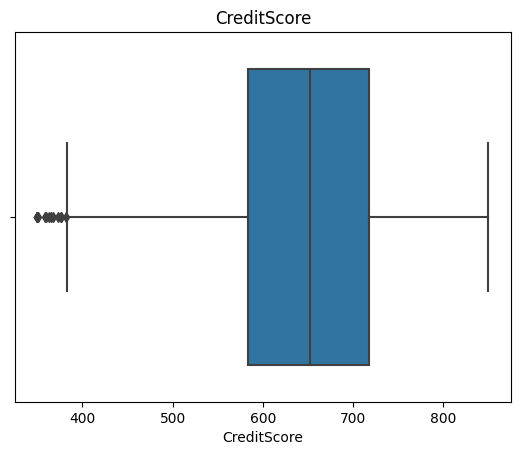

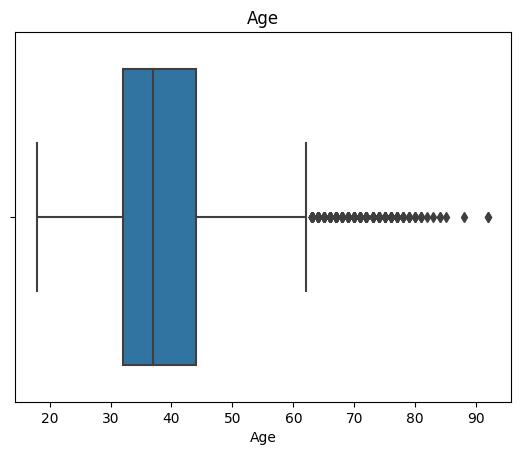

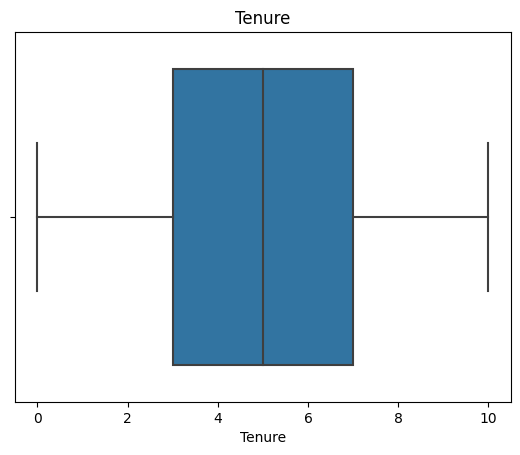

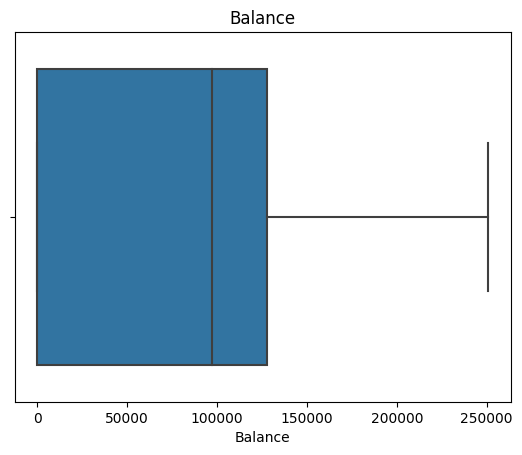

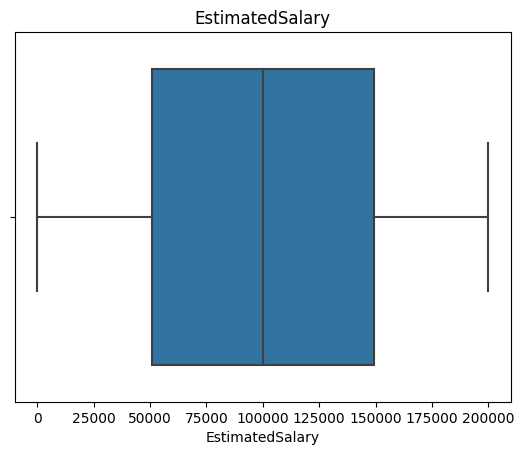

In [16]:
#variables numericas
numericas=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
for i in numericas:
  sns.boxplot(data=df,x=i)
  plt.title(i)
  plt.show()

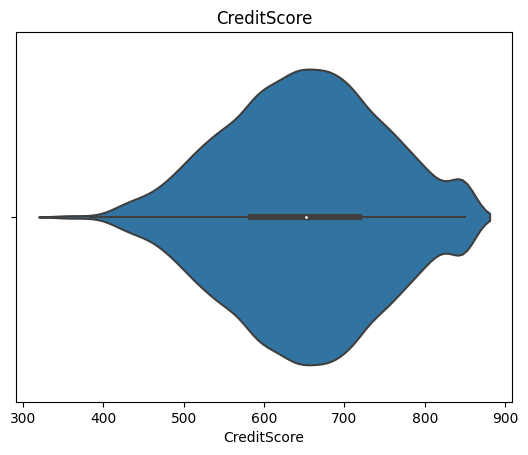

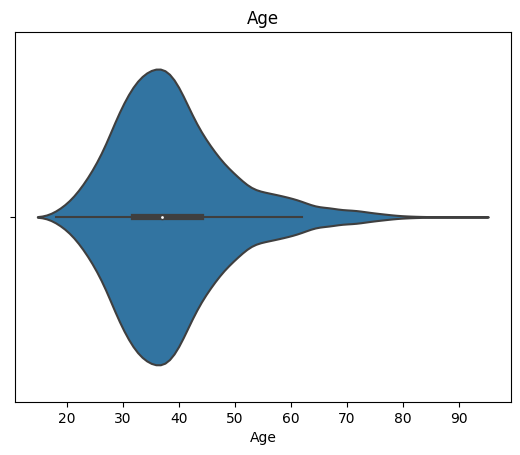

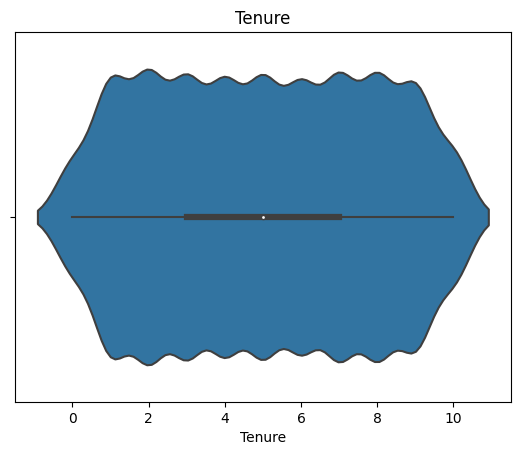

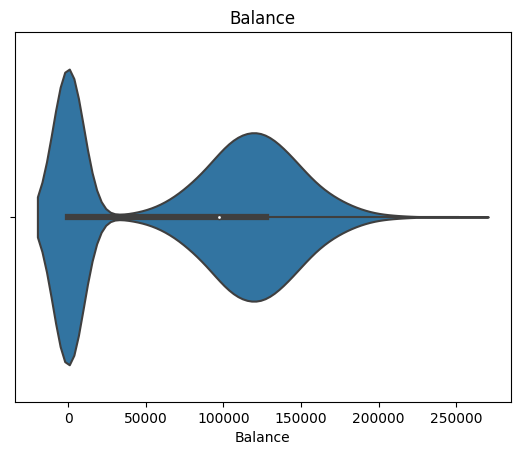

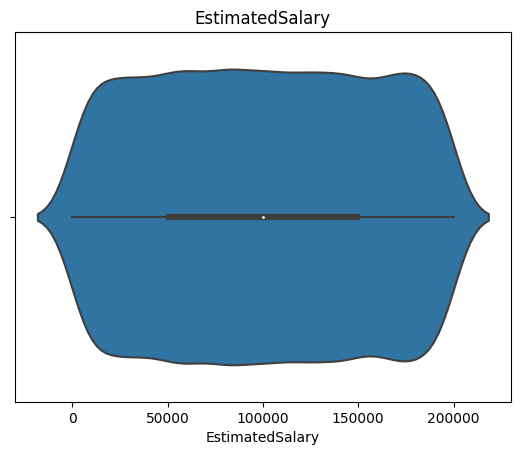

In [17]:
for i in numericas:
  sns.violinplot(data=df,x=i)
  plt.title(i)
  plt.show()

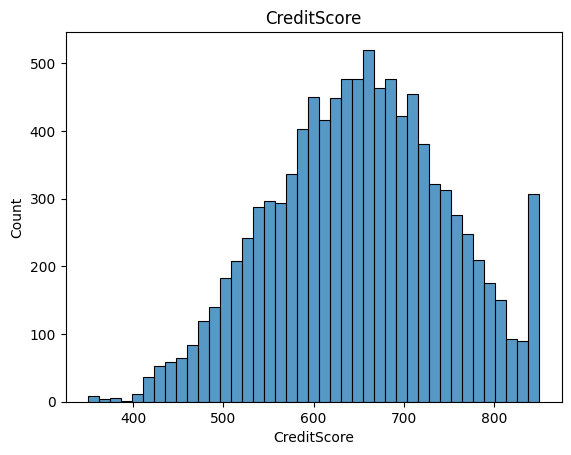

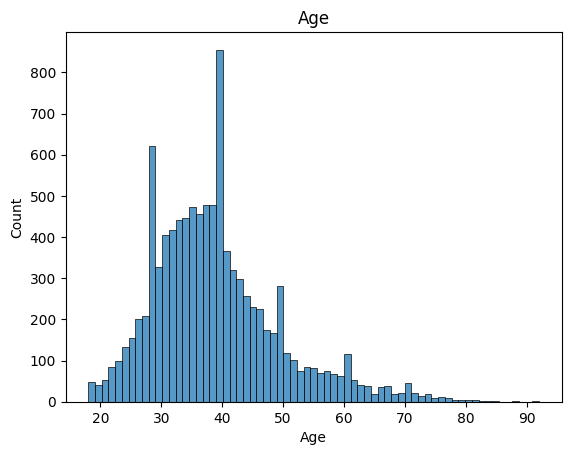

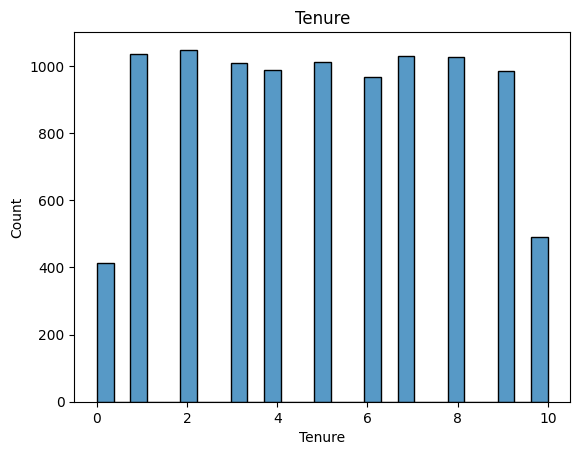

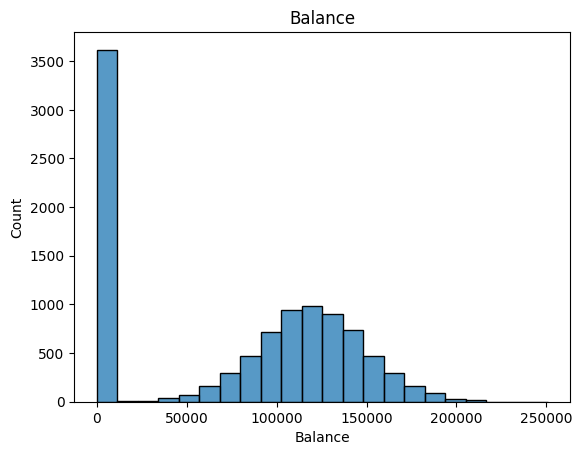

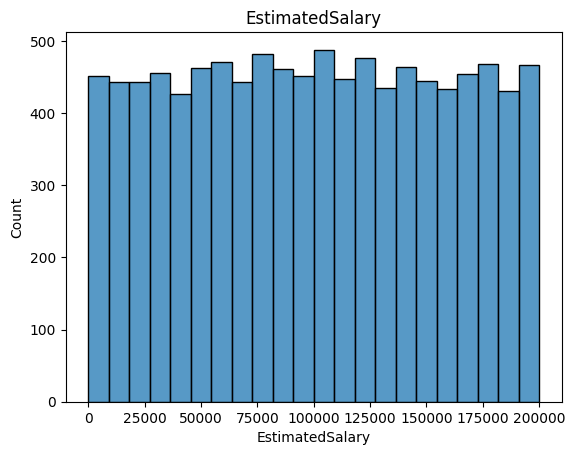

In [18]:
for i in numericas:
  sns.histplot(data=df,x=i)
  plt.title(i)
  plt.show()

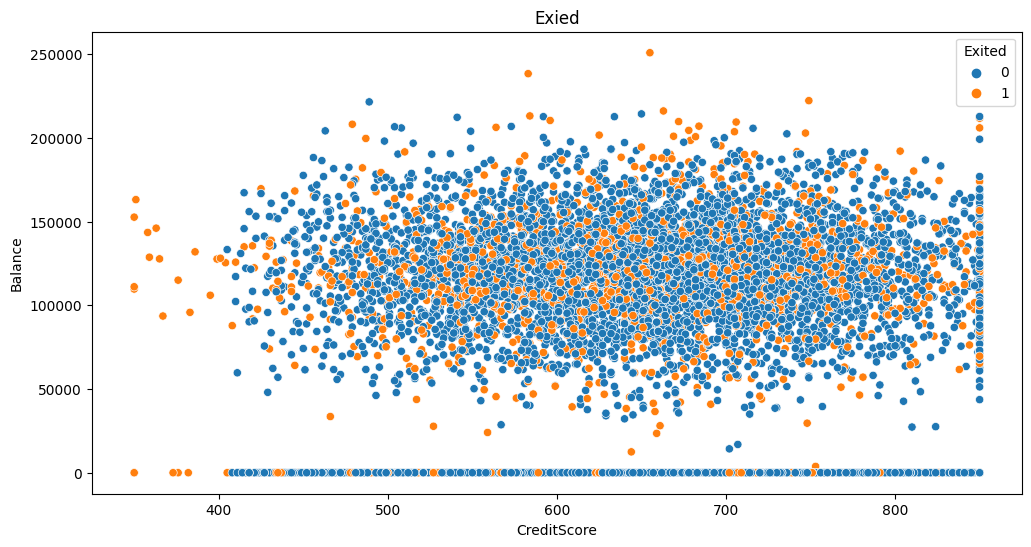

In [19]:
plt.figure(figsize=(12,6),dpi=100)
sns.scatterplot(x='CreditScore',y='Balance',hue='Exited',data=df)
plt.title('Exied')
plt.show()

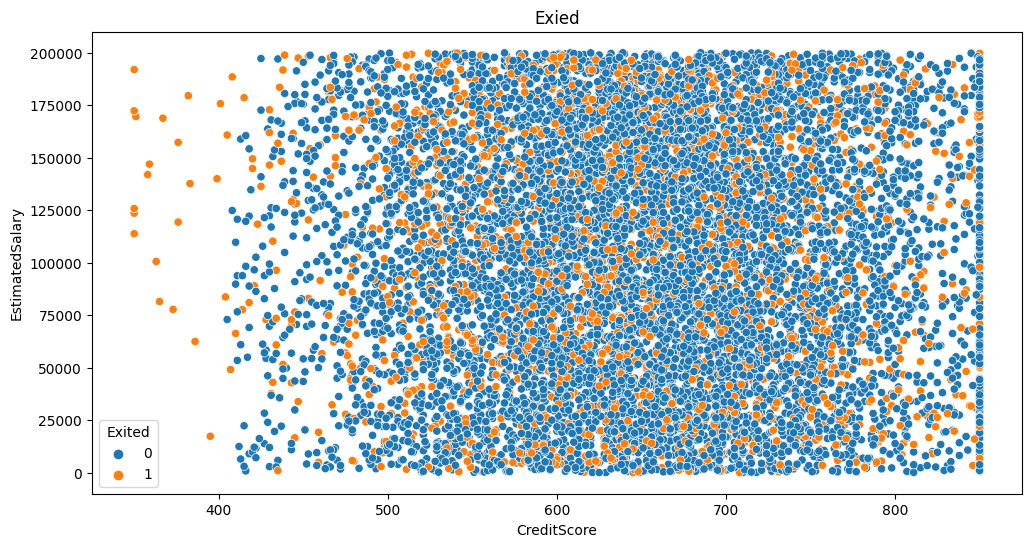

In [20]:
plt.figure(figsize=(12,6),dpi=100)
sns.scatterplot(x='CreditScore',y='EstimatedSalary',hue='Exited',data=df)
plt.title('Exied')
plt.show()

In [21]:
#check missing value
missing_value=df.isnull().sum()*100/df.shape[0]
missing_value[missing_value>0].sort_values(ascending=False)

Series([], dtype: float64)

## **Label Encoding**

In [22]:
for col in df.select_dtypes(include=['object']).columns:
  print(f"{col}: {df[col].unique()}")

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [23]:
for col in df.select_dtypes(include=['object']).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(df[col].unique())
  df[col]=label_encoder.transform(df[col])
  print(f"{col}:{df[col].unique()}")

Geography:[0 2 1]
Gender:[0 1]


In [24]:
#remove outlier using z-score
def remove_outlier(df,cols,threshold=3):
  for col in cols:
    z=np.abs(stats.zscore(df[col]))
    df=df[(z<threshold)|(df[col].isnull())]
  return df

In [25]:
df.shape

(10000, 11)

In [26]:
selected_cols=['Age']
df1=remove_outlier(df,selected_cols)
df1.shape

(9867, 11)

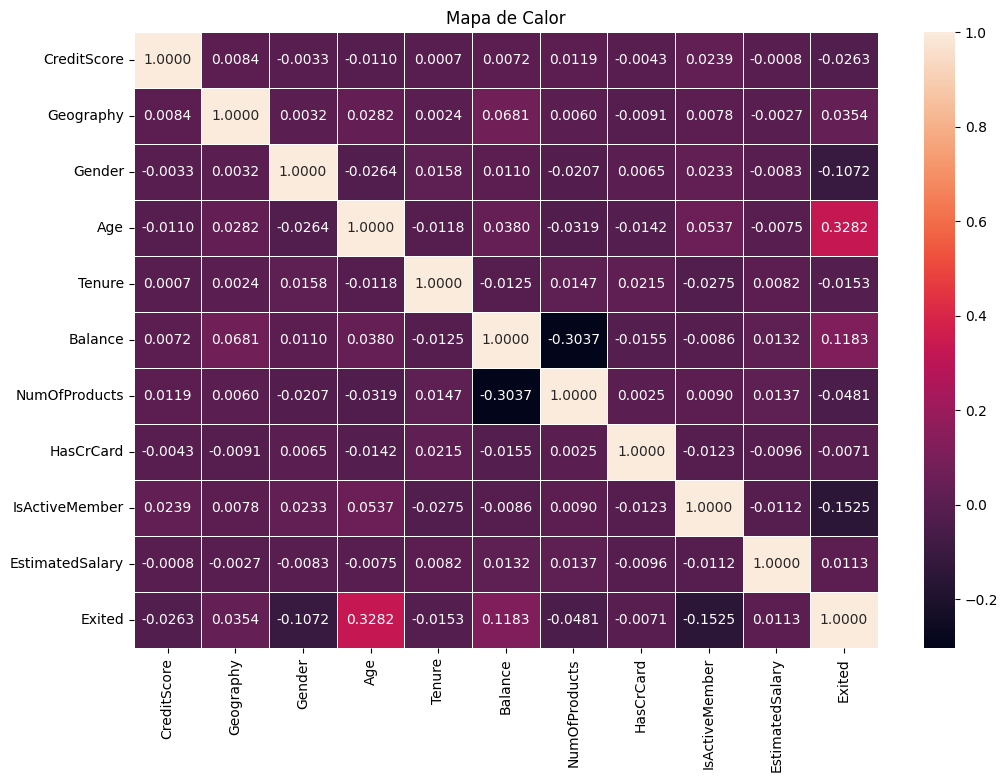

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True,fmt=".4f",linewidths=.5)
plt.title("Mapa de Calor")
plt.show()

## Train Test Split

In [28]:
X=df1.drop('Exited',axis=1)
y=df1['Exited']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100,stratify=y)

## **Modelos**

### **Decision Tree**

In [30]:
dtree=DecisionTreeClassifier(class_weight='balanced')
#parametros
params={
    'max_depth':[3,4,5,6,7,9,10,15,20],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,25,50,100,250]
}
#hiperparametros
grid_search=GridSearchCV(dtree,params,cv=5)
grid_search.fit(X_train,y_train)

#The best hiperparametros
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 25}


In [31]:
dtree=DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=25)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, random_state=25)

In [32]:
y_pred=dtree.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 79.48 %


In [33]:
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred,average='micro')
    prec = precision_score(y_true, y_pred,average='micro')
    rec = recall_score(y_true, y_pred,average='micro')
    jacc=jaccard_score(y_true,y_pred,average='micro')
    log=log_loss(y_true,y_pred)
    return {'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec,'Jaccard':jacc,'Log':log}


In [34]:
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.7948328267477204,
 'F1 Score': 0.7948328267477204,
 'Precision': 0.7948328267477204,
 'Recall': 0.7948328267477204,
 'Jaccard': 0.6595208070617906,
 'Log': 7.394974479530115}

In [35]:
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Importance":dtree.feature_importances_
})

fi=imp_df.sort_values(by='Importance',ascending=False)
fi.head(10)

,Feature Name,Importance
3,Age,0.239748
0,CreditScore,0.152046
5,Balance,0.148759
9,EstimatedSalary,0.146615
6,NumOfProducts,0.121383
4,Tenure,0.071609
8,IsActiveMember,0.050722
1,Geography,0.031235
2,Gender,0.022632
7,HasCrCard,0.015250


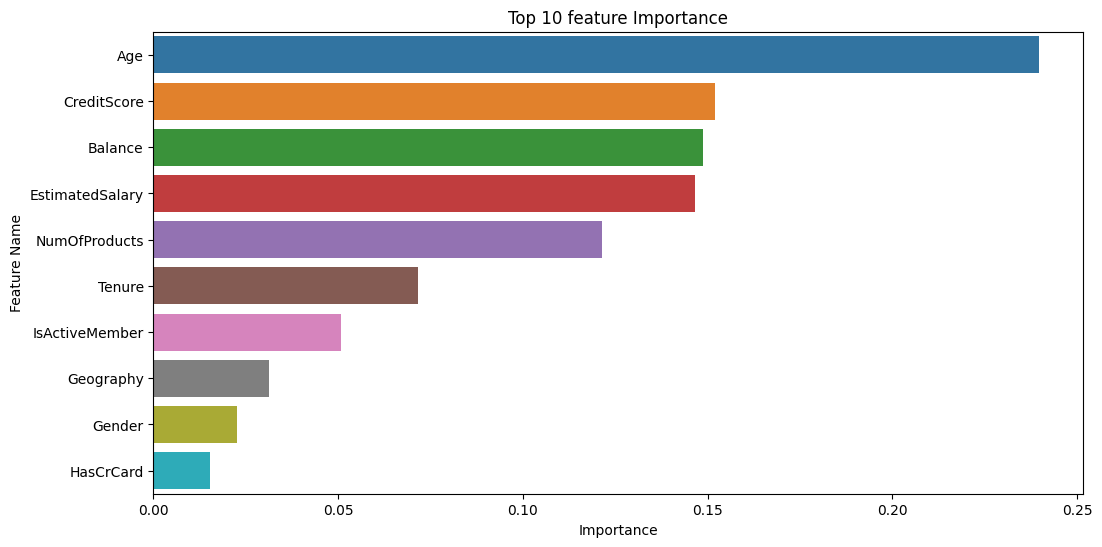

In [36]:
fi_2=fi.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=fi_2,x='Importance',y='Feature Name')
plt.title('Top 10 feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

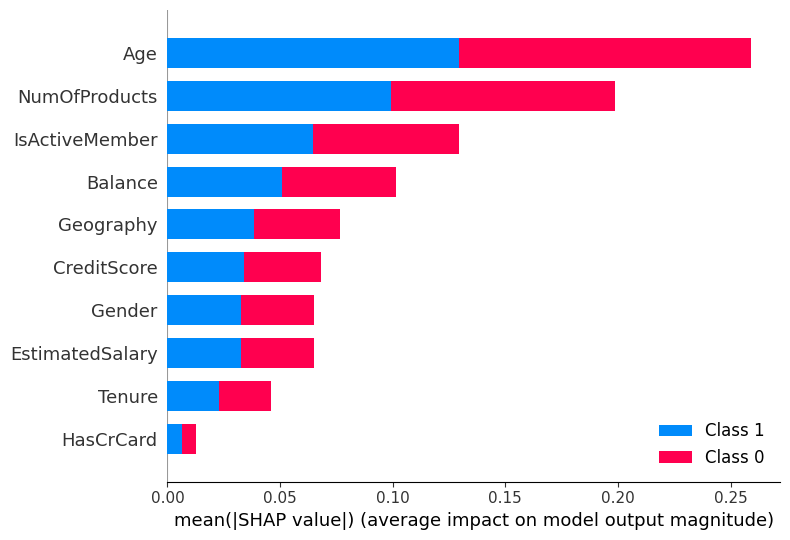

In [37]:
def modelo(model):
  explainer=shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_test)
  shap.summary_plot(shap_values,X_test)

modelo(dtree)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


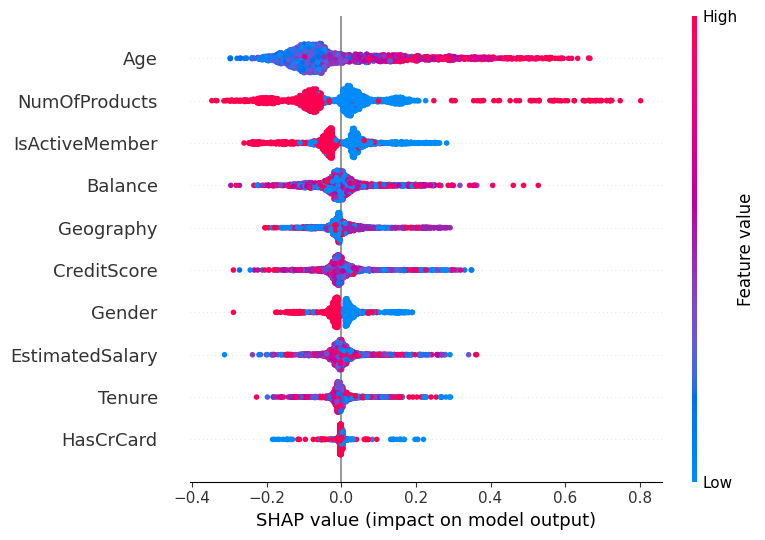

In [58]:
def modelo_shap(model):
  explainer=shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_test)
  shap.summary_plot(shap_values[1],X_test.values,feature_names=X_test.columns)
modelo_shap(dtree)

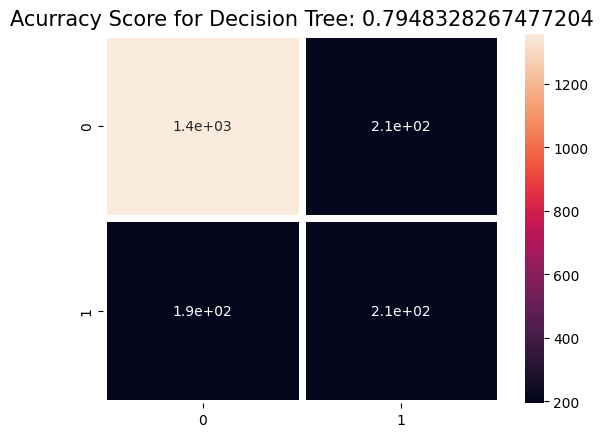

In [39]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Decision Tree: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(dtree)

**Valor AUC**

* El valor AUC (área bajo la curva) es una métrica que se utiliza comúnmente para 
evaluar el desempeño de un modelo de clasificación binaria. AUC es una medida de la capacidad del modelo para distinguir entre las clases positivas y negativas. El valor AUC se encuentra en el rango de 0 a 1, donde un valor de 1 indica que el modelo tiene un desempeño perfecto, mientras que un valor de 0.5 indica que el modelo tiene un desempeño aleatorio.

* En tu caso, el valor AUC obtenido es de 0.62555. Esto indica que el modelo tiene un desempeño mejor que el aleatorio, pero no es muy bueno en la tarea de clasificación. Un valor AUC de 0.5 significa que el modelo no tiene capacidad de discriminación, y un valor superior a 0.5 indica que el modelo tiene cierta capacidad de discriminación. Sin embargo, para una tarea de clasificación, se espera que el valor AUC sea lo más cercano posible a 1.

* Es importante tener en cuenta que el valor AUC solo proporciona una medida general del desempeño del modelo y no indica necesariamente la calidad de las predicciones individuales del modelo. Por lo tanto, es recomendable utilizar varias métricas de evaluación de modelos en conjunto para obtener una imagen completa del desempeño del modelo.

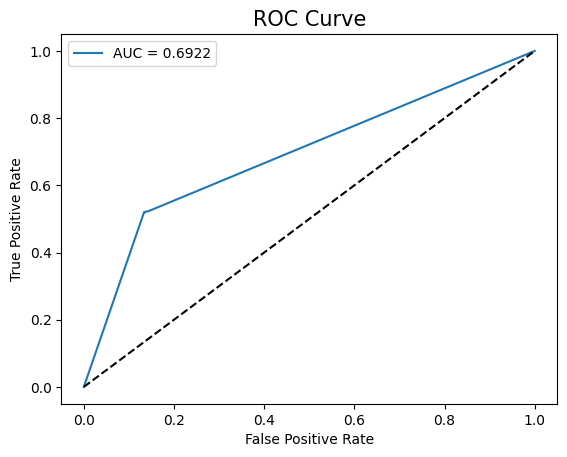

In [40]:
def roc_model(model):
  from sklearn.metrics import roc_curve, roc_auc_score
  y_pred_proba=model.predict_proba(X_test)[:][:,1]
  df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
  df_actual_predicted.index = y_test.index
  fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
  auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

  plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
  plt.plot(fpr, fpr, linestyle = '--', color='k')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve', size = 15)
  plt.legend()

roc_model(dtree)

### Random Forest

In [41]:
rfc=RandomForestClassifier(class_weight='balanced')
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,5,10],
    'max_features':['sqrt','log2',None]
}

In [42]:
grid_search=GridSearchCV(rfc,param_grid,cv=5)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}


In [43]:
rfc=RandomForestClassifier(random_state=100,max_features='log2',n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=100)

In [44]:
y_pred=rfc.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 85.92 %


In [45]:
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred,average='micro')
    prec = precision_score(y_true, y_pred,average='micro')
    rec = recall_score(y_true, y_pred,average='micro')
    jacc=jaccard_score(y_true,y_pred,average='micro')
    log=log_loss(y_true,y_pred)
    return {'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec,'Jaccard':jacc,'Log':log}

In [46]:
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.8591691995947315,
 'F1 Score': 0.8591691995947315,
 'Precision': 0.8591691995947315,
 'Recall': 0.8591691995947315,
 'Jaccard': 0.7531083481349912,
 'Log': 5.076056556319437}

In [47]:
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Importance":rfc.feature_importances_
})

fi=imp_df.sort_values(by='Importance',ascending=False)
fi.head(10)

,Feature Name,Importance
3,Age,0.243717
9,EstimatedSalary,0.147085
0,CreditScore,0.142145
5,Balance,0.139263
6,NumOfProducts,0.132533
4,Tenure,0.081049
8,IsActiveMember,0.038991
1,Geography,0.038587
7,HasCrCard,0.018826
2,Gender,0.017805


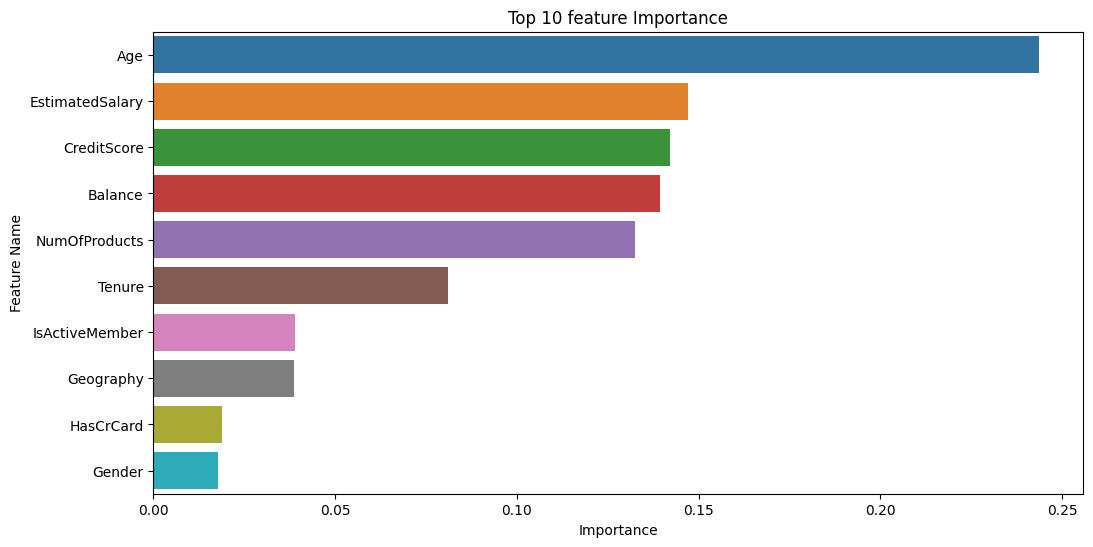

In [48]:
fi_2=fi.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=fi_2,x='Importance',y='Feature Name')
plt.title('Top 10 feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

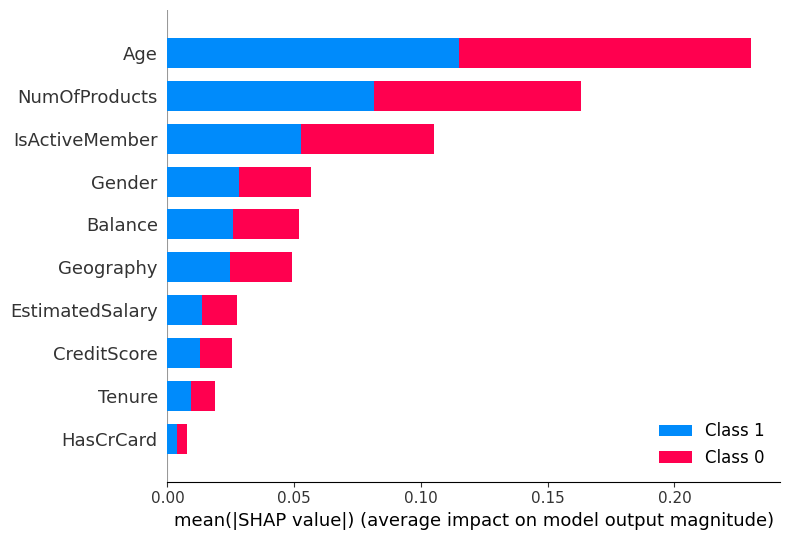

In [49]:
modelo(rfc)

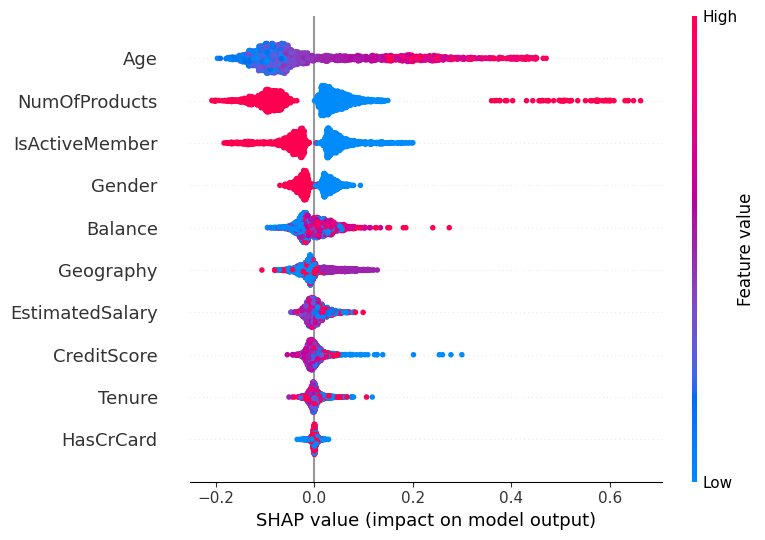

In [59]:
modelo_shap(rfc)

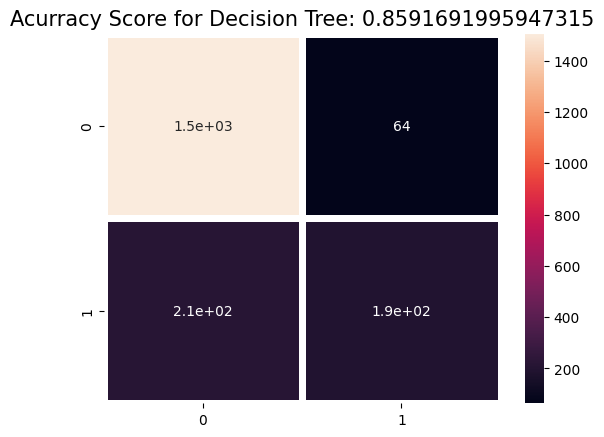

In [57]:
matrix(rfc)

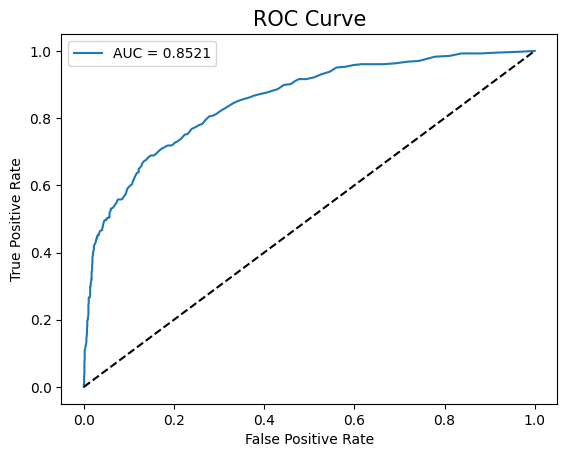

In [61]:
roc_model(rfc)